## Case Study: The babynames Dataset

- Work with a new dataset that represents the names of babies born in the United States each year. 
- Learn how to use grouped mutates and window functions to ask and answer more complex questions about your data. 
- And use a combination of dplyr and ggplot2 to make interesting graphs to further explore your data.

In [14]:
library(dplyr)
library(ggplot2)
library(repr)
options(repr.plot.width=15, repr.plot.height=6)

In [2]:
babynames <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/4984/datasets/a924ac5d86adba2e934d489cb9db446236f62b2c/babynames.rds")))
head(babynames)

year,name,number
<dbl>,<chr>,<int>
1880,Aaron,102
1880,Ab,5
1880,Abbie,71
1880,Abbott,5
1880,Abby,6
1880,Abe,50


In [3]:
head(babynames %>%
  # Filter for the year 1990
  filter(year ==1990)%>%
  # Sort the number column in descending order 
  arrange(desc(number)),5)

year,name,number
<dbl>,<chr>,<int>
1990,Michael,65560
1990,Christopher,52520
1990,Jessica,46615
1990,Ashley,45797
1990,Matthew,44925


> The most common names for babies born in the US in 1990 were Michael, Christopher, and Jessica.

Find the most common name in each year

In [4]:
# Find the most common name in each year
head(babynames %>%
  group_by(year)%>%
    top_n(1,number),10)
  

year,name,number
<dbl>,<chr>,<int>
1880,John,9701
1885,Mary,9166
1890,Mary,12113
1895,Mary,13493
1900,Mary,16781
1905,Mary,16135
1910,Mary,22947
1915,Mary,58346
1920,Mary,71175


> It looks like John was the most common name in 1880, and Mary was the most common name for a while after that.

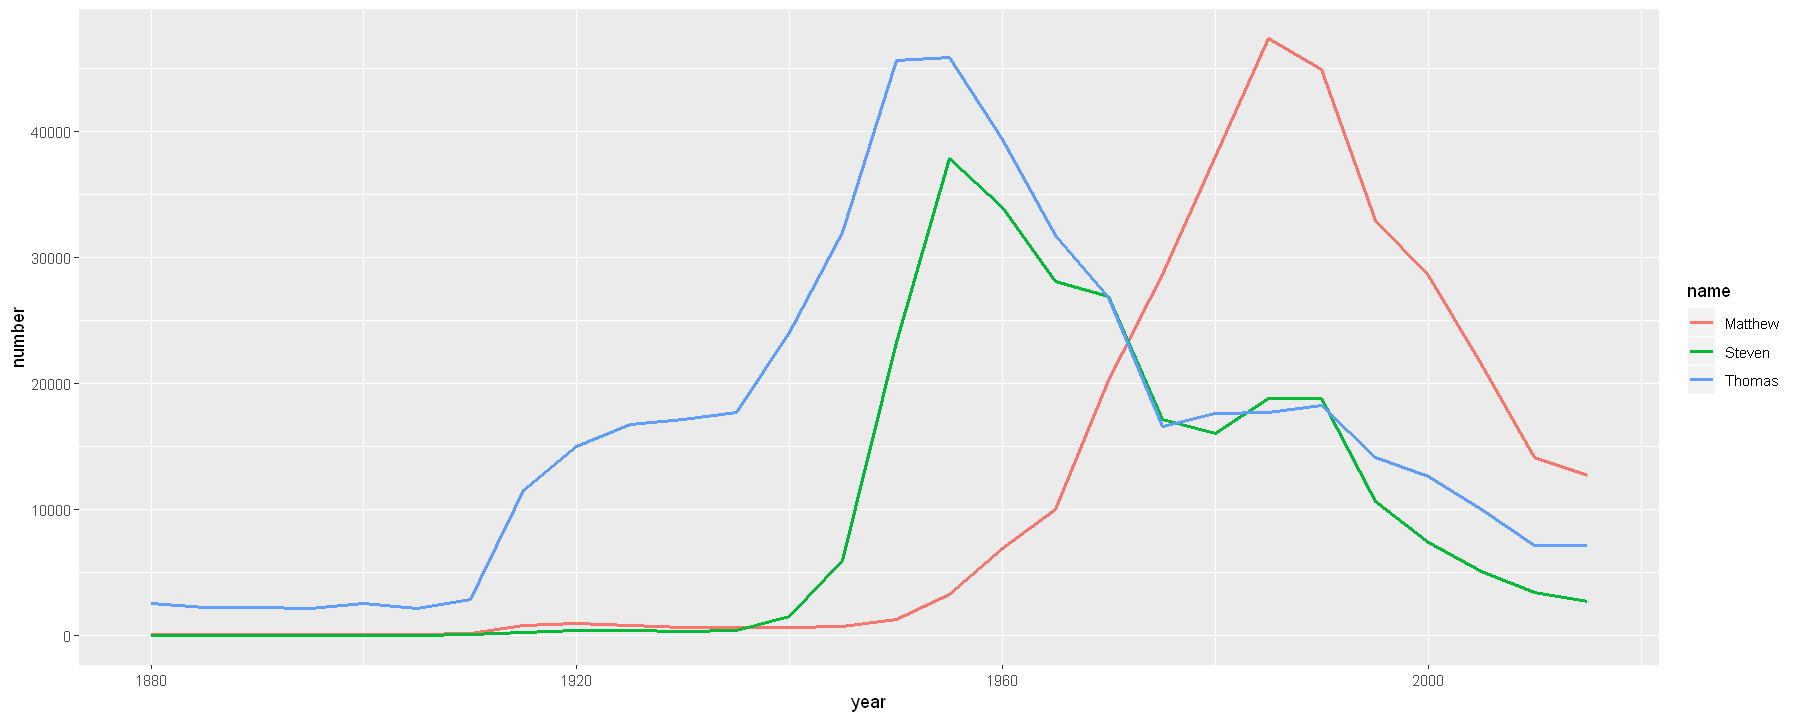

In [5]:


# Filter for the names Steven, Thomas, and Matthew 
selected_names <- babynames %>%
  filter(name %in% c("Steven", "Thomas", "Matthew"))

# Plot the names using a different color for each name
ggplot(selected_names, aes(x = year, y = number, color = name)) +
  geom_line(size=1)



In [6]:
# Calculate the fraction of people born each year with the same name
babynames %>%
  group_by(year) %>%
  mutate(year_total = sum(number)) %>%
  ungroup() %>%
  mutate(fraction = number / year_total) %>%
# Find the year each name is most common
  group_by(name) %>%
  top_n(1,fraction)


year,name,number,year_total,fraction
<dbl>,<chr>,<int>,<int>,<dbl>
1880,Abbott,5,201478,2.481661e-05
1880,Abe,50,201478,2.481661e-04
1880,Abner,27,201478,1.340097e-04
1880,Adelbert,28,201478,1.389730e-04
1880,Adella,26,201478,1.290463e-04
1880,Adolf,6,201478,2.977993e-05
1880,Adolph,93,201478,4.615889e-04
1880,Agustus,5,201478,2.481661e-05
1880,Albert,1493,201478,7.410238e-03


In [7]:
head(babynames %>%
  group_by(name) %>%
  mutate(name_total = sum(number),
         name_max = max(number)) %>%
  # Ungroup the table 
          ungroup()%>%
      # Add the fraction_max column containing the number by the name maximum 
          mutate(fraction_max =number/name_max),10)
  

  

year,name,number,name_total,name_max,fraction_max
<dbl>,<chr>,<int>,<int>,<int>,<dbl>
1880,Aaron,102,114739,14635,0.0069695934
1880,Ab,5,77,31,0.1612903226
1880,Abbie,71,4330,445,0.1595505618
1880,Abbott,5,217,51,0.0980392157
1880,Abby,6,11272,1753,0.0034227039
1880,Abe,50,1832,271,0.1845018450
1880,Abel,9,10565,3245,0.0027734977
1880,Abigail,12,72600,15762,0.0007613247
1880,Abner,27,1552,199,0.1356783920


In [8]:
names_normalized <- babynames %>%
                     group_by(name) %>%
                     mutate(name_total = sum(number),
                            name_max = max(number)) %>%
                     ungroup() %>%
                     mutate(fraction_max = number / name_max)

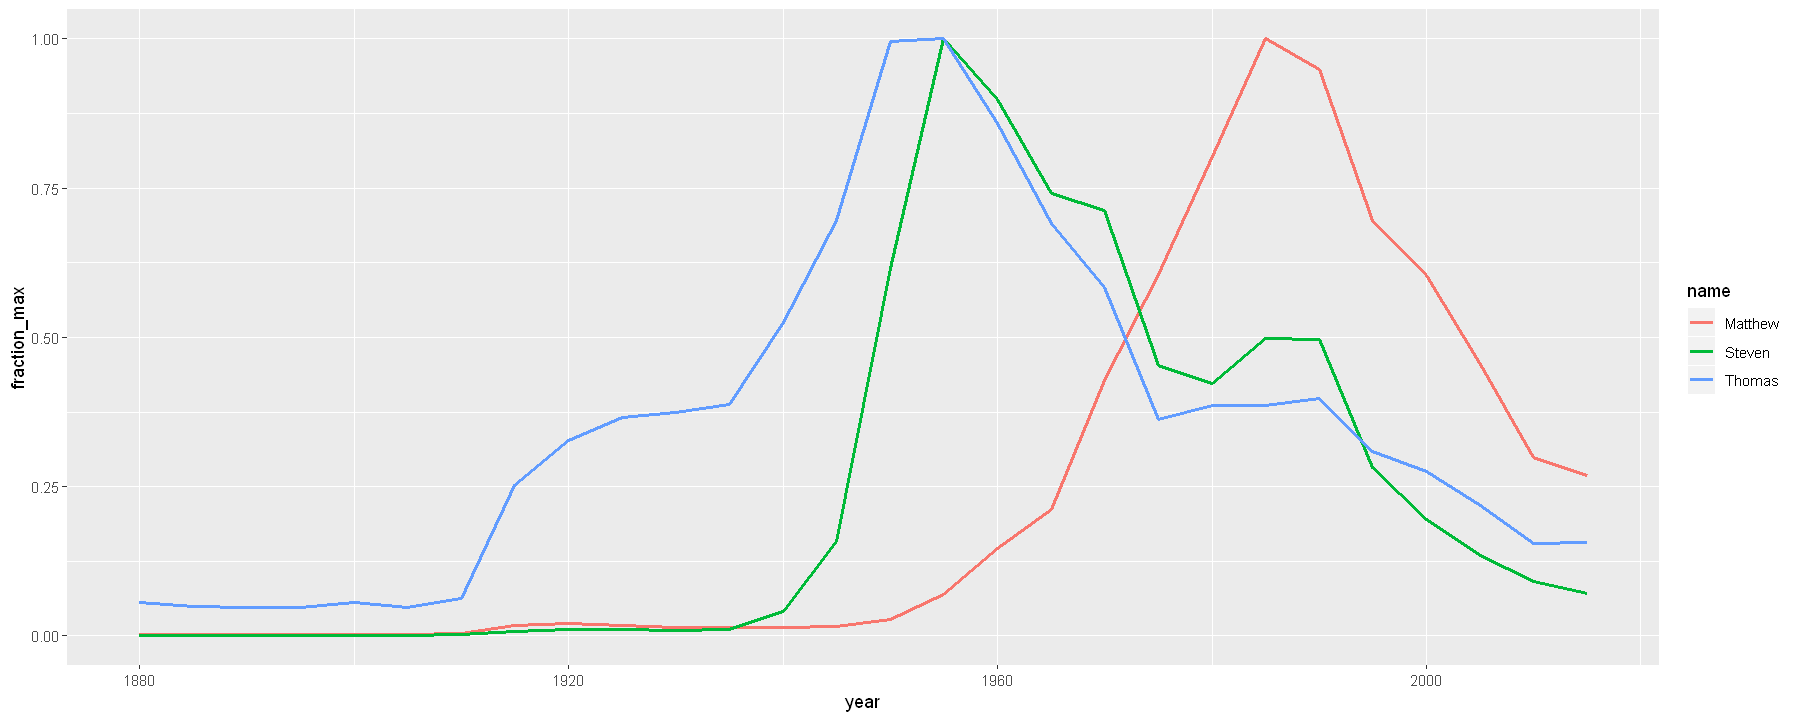

In [9]:
# Filter for the names Steven, Thomas, and Matthew
names_filtered <- names_normalized %>%
  filter(name %in% c('Steven', 'Thomas', 'Matthew'))
# Visualize these names over time
ggplot(names_filtered, aes(x=year, y=fraction_max, color =name)) +geom_line(size=1)



In [10]:
babynames_fraction <- babynames %>%
    group_by(year) %>%
        mutate(year_total = sum(number)) %>%
    ungroup() %>%
        mutate(fraction = number / year_total)

In [11]:
babynames_fraction %>%
  # Arrange the data in order of name, then year 
  arrange(name, year)%>%
  # Group the data by name
  group_by(name)%>%
  # Add a ratio column that contains the ratio between each year 
  mutate(ratio=fraction/lag(fraction))

year,name,number,year_total,fraction,ratio
<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>
2010,Aaban,9,3672066,2.450936e-06,NA
2015,Aaban,15,3648781,4.110962e-06,1.6773026
1995,Aadam,6,3652750,1.642598e-06,NA
2000,Aadam,6,3767293,1.592656e-06,0.9695954
2005,Aadam,6,3828460,1.567210e-06,0.9840231
2010,Aadam,7,3672066,1.906284e-06,1.2163552
2015,Aadam,22,3648781,6.029411e-06,3.1629135
2010,Aadan,11,3672066,2.995589e-06,NA
2015,Aadan,10,3648781,2.740641e-06,0.9148923


In [12]:
babynames_ratios_filtered <- babynames_fraction %>%
                     arrange(name, year) %>%
                     group_by(name) %>%
                     mutate(ratio = fraction / lag(fraction)) %>%
                     filter(fraction >= 0.00001)

In [13]:

babynames_ratios_filtered %>%
  # Extract the largest ratio from each name 
  top_n(1, ratio) %>%
  # Sort the ratio column in descending order 
  arrange(desc(ratio)) %>%
  # Filter for fractions greater than or equal to 0.001
  filter(fraction>=0.001)

year,name,number,year_total,fraction,ratio
<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>
1960,Tammy,14365,4152075,0.003459716,70.115005
2005,Nevaeh,4610,3828460,0.001204140,45.821681
1940,Brenda,5460,2301630,0.002372232,37.533147
1885,Grover,774,240822,0.003213992,35.974928
1945,Cheryl,8170,2652029,0.003080660,24.879087
1955,Lori,4980,4012691,0.001241062,23.245643
2010,Khloe,5411,3672066,0.001473557,23.215866
1950,Debra,6189,3502592,0.001766977,22.638042
2010,Bentley,4001,3672066,0.001089577,22.426900
